# Simple timecourse

In this example, a simple timecourse is defined for a simple ODE. Simulation and optimization is demonstrated.

The ODE is $\frac{d}{dt} x = p  q$, with $p$ an estimated parameter, and $q$ a timecourse parameter.

NB: in code, symbols are suffixed with `_` to avoid conflicts with packages.

In [1]:
from itertools import chain
from pathlib import Path

import amici
import numpy as np
import petab
import petab_timecourse

from simple_timecourse_helpers import get_analytical_x_, get_analytical_sx_


petab_path = Path('input') / 'simple_timecourse'
timecourse_id = 'timecourse1'
true_p_ = 1

In [2]:
petab_problem = petab.Problem.from_yaml(str(petab_path / 'petab.yaml'))

The parameter timecourse is represented graphically here. At the indicated timepoints, the value of $q$ (`q_`) changes.
<img src="input/simple_timecourse/timecourse.png" width="400">

In [3]:
timecourse_df = petab_timecourse.get_timecourse_df(petab_path / 'timecourse.tsv')
petab_problem.timecourse_df = timecourse_df
timecourse = petab_timecourse.Timecourse.from_df(timecourse_df, timecourse_id)

In [4]:
from petab_timecourse.timecourse import Timecourse

timecourse = Timecourse.from_df(timecourse_df=timecourse_df, timecourse_id='timecourse1')

In [5]:
[period.condition_id for period in timecourse.periods]

['q_positive', 'q_zero', 'q_negative', 'q_zero', 'q_positive']

In [6]:
from petab_timecourse.simulator import AmiciSimulator
simulator = AmiciSimulator(petab_problem=petab_problem, timecourse_id='timecourse1')
simulator.amici_solver.setSensitivityOrder(1)

2022-06-01 15:38:18.266 - amici.petab_import - INFO - Importing model ...
2022-06-01 15:38:18.269 - amici.petab_import - INFO - Model name is 'fixed_timepoint_parameter_timecourse'.
Writing model code to '/home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/fixed_timepoint_parameter_timecourse'.
2022-06-01 15:38:18.270 - amici.petab_import - INFO - Species: 1
2022-06-01 15:38:18.270 - amici.petab_import - INFO - Global parameters: 2
2022-06-01 15:38:18.271 - amici.petab_import - INFO - Reactions: 0
2022-06-01 15:38:18.283 - amici.petab_import - INFO - Observables: 2
2022-06-01 15:38:18.283 - amici.petab_import - INFO - Sigmas: 2
2022-06-01 15:38:18.285 - amici.petab_import - DEBUG - Adding output parameters to model: OrderedDict()
2022-06-01 15:38:18.286 - amici.petab_import - DEBUG - Adding initial assignments for []
2022-06-01 15:38:18.287 - amici.petab_import - DEBUG - Condition table: (5, 1)
2022-06-01 15:38:18.287 - amici.petab_imp

2022-06-01 15:38:19.098 - amici.ode_export - INFO - Finished computing dydx                    ++++ (1.17E-02s)
2022-06-01 15:38:19.110 - amici.ode_export - INFO - Finished running smart_jacobian           +++++ (2.88E-04s)
2022-06-01 15:38:19.116 - amici.ode_export - INFO - Finished simplifying dydw                 +++++ (1.12E-04s)
2022-06-01 15:38:19.117 - amici.ode_export - INFO - Finished computing dydw                    ++++ (1.25E-02s)
2022-06-01 15:38:19.126 - amici.ode_export - INFO - Finished simplifying dydx                  ++++ (2.14E-04s)
2022-06-01 15:38:19.126 - amici.ode_export - INFO - Finished computing dydx                     +++ (4.53E-02s)
2022-06-01 15:38:19.128 - amici.ode_export - INFO - Finished writing dydx.cpp                    ++ (5.02E-02s)
2022-06-01 15:38:19.150 - amici.ode_export - INFO - Finished running smart_jacobian           +++++ (2.21E-04s)
2022-06-01 15:38:19.156 - amici.ode_export - INFO - Finished simplifying dydp                 +++++ (1.1

2022-06-01 15:38:34.619 - amici.petab_import - INFO - Finished Importing PEtab model                (1.64E+01s)
2022-06-01 15:38:34.627 - amici.petab_import - INFO - Successfully loaded model fixed_timepoint_parameter_timecourse from /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/fixed_timepoint_parameter_timecourse.


running AmiciInstall
Adding OpenMP flags...
hdf5.h found in /usr/include/hdf5/serial
libhdf5.a found in /usr/lib/x86_64-linux-gnu/hdf5/serial
running build_ext
Changed extra_compile_args for unix to ['-fopenmp', '-std=c++14']
Building model extension in /home/dilan/Documents/future_annex/optimal_control/packages/petab_timecourse/doc/examples/amici_models/fixed_timepoint_parameter_timecourse
building 'fixed_timepoint_parameter_timecourse._fixed_timepoint_parameter_timecourse' extension
Testing SWIG executable swig4.0... SUCCEEDED.
swigging swig/fixed_timepoint_parameter_timecourse.i to swig/fixed_timepoint_parameter_timecourse_wrap.cpp
swig4.0 -python -c++ -modern -outdir fixed_timepoint_parameter_timecourse -I/home/dilan/Documents/future_annex/optimal_control/packages/AMICI/python/sdist/amici/swig -I/home/dilan/Documents/future_annex/optimal_control/packages/AMICI/python/sdist/amici/include -o swig/fixed_timepoint_parameter_timecourse_wrap.cpp swig/fixed_timepoint_parameter_timecourse.

In [7]:
"""

from petab_timecourse.simulator import AmiciSimulator
simulator = AmiciSimulator(petab_problem=petab_problem, timecourse_id='timecourse1')
simulator.amici_solver.setSensitivityOrder(1)

results = simulator.simulate(problem_parameters_periods=[{'p_': v} for v in p_values])

x_ = collect_x(results)
sx_ = collect_sx(results)
T = collect_t(results)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(T, x_, lw=5, label='Simulated state')
ax.legend()
ax.set_title('State trajectory');
"""

"\n\nfrom petab_timecourse.simulator import AmiciSimulator\nsimulator = AmiciSimulator(petab_problem=petab_problem, timecourse_id='timecourse1')\nsimulator.amici_solver.setSensitivityOrder(1)\n\nresults = simulator.simulate(problem_parameters_periods=[{'p_': v} for v in p_values])\n\nx_ = collect_x(results)\nsx_ = collect_sx(results)\nT = collect_t(results)\n\nimport matplotlib.pyplot as plt\nfig, ax = plt.subplots(figsize=(10,10))\nax.plot(T, x_, lw=5, label='Simulated state')\nax.legend()\nax.set_title('State trajectory');\n"

In [8]:
p_values = [0.5, 2.0, 1.0, 1.5, 2.0]

results = simulator.simulate(problem_parameters_periods=[{'p_': v} for v in p_values])

In [9]:
from petab_timecourse.amici import collect_x, collect_sx, collect_t


x_ = collect_x(results)
sx_ = collect_sx(results)
T = collect_t(results)

analytical_x_  = [np.round(get_analytical_x_(t, timecourse=timecourse, p_=true_p_), 5)  for t in T]
analytical_sx_ = [np.round(get_analytical_sx_(t, timecourse=timecourse), 5) for t in T]

# The state (x_) trajectory is correct.
#assert np.isclose(x_, analytical_x_).all()
# The state (x_) forward sensitivity w.r.t. the parameter (p_) is correct.
#assert np.isclose(sx_, analytical_sx_).all()

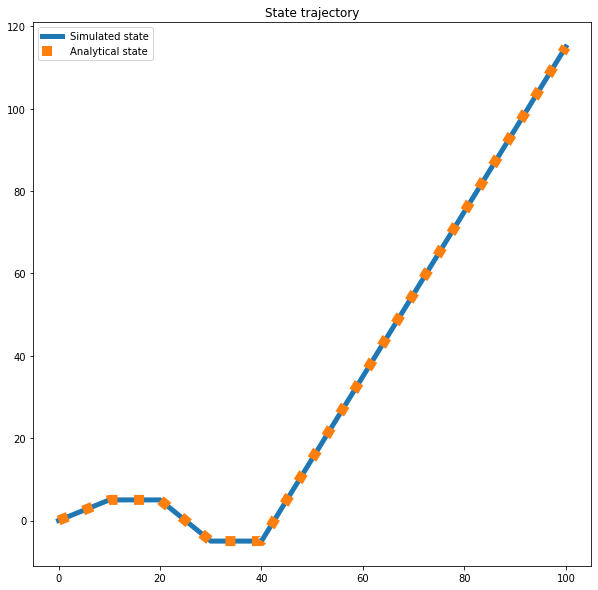

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(T, x_, lw=5, label='Simulated state')
ax.plot(T, analytical_x_, linestyle=':', lw=10, label='Analytical state')
ax.legend()
ax.set_title('State trajectory');

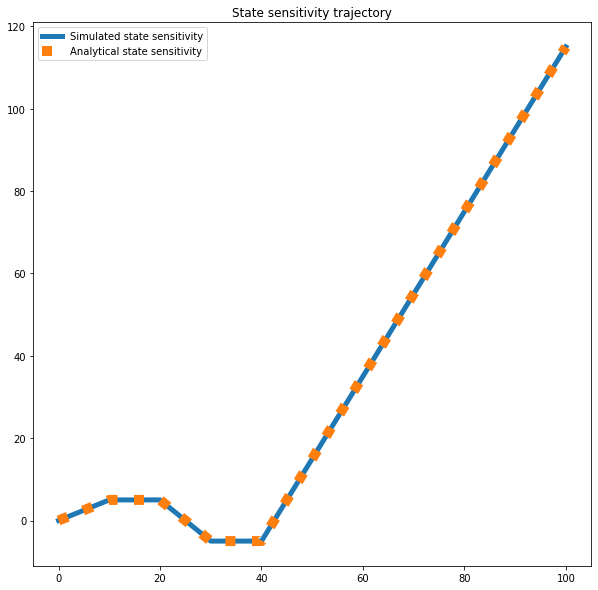

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(T, x_, lw=5, label='Simulated state sensitivity')
ax.plot(T, analytical_x_, linestyle=':', lw=10, label='Analytical state sensitivity')
ax.legend()
ax.set_title('State sensitivity trajectory');